In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1402541877e53dfe4da01a70b35d9280


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# try:
    # Do something
#except:
    # print("An exception occurred")
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | general pico
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | kaka
Processing Record 5 of Set 1 | cap malheureux
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | manzanillo
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | longido
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | mazatlan
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hobyo
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | luanda
Processing Record 21 of Set 1 | itaqui
Processing Record 22 of Set 1 | norman wells
Processing Record 23 of Set 1 | grand

Processing Record 37 of Set 4 | gaozhou
Processing Record 38 of Set 4 | teya
Processing Record 39 of Set 4 | koath
Processing Record 40 of Set 4 | san patricio
Processing Record 41 of Set 4 | phalodi
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | yeniseysk
Processing Record 44 of Set 4 | nalut
Processing Record 45 of Set 4 | tarnogskiy gorodok
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | aloleng
Processing Record 48 of Set 4 | olafsvik
Processing Record 49 of Set 4 | novo oriente
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | uthal
Processing Record 3 of Set 5 | te anau
Processing Record 4 of Set 5 | ormara
Processing Record 5 of Set 5 | mvomero
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | masterton
Processing Record 8 of Set 5 | sulangan
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 

Processing Record 24 of Set 8 | banepa
Processing Record 25 of Set 8 | yashkul
Processing Record 26 of Set 8 | turukhansk
Processing Record 27 of Set 8 | fare
Processing Record 28 of Set 8 | yumen
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | thunder bay
Processing Record 31 of Set 8 | terekli-mekteb
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | moranbah
Processing Record 34 of Set 8 | sola
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | mwense
Processing Record 37 of Set 8 | beyla
Processing Record 38 of Set 8 | kamaishi
Processing Record 39 of Set 8 | porto santo
Processing Record 40 of Set 8 | basco
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | waspan
Processing Record 43 of Set 8 | tuatapere
Processing Record 44 of Set 8 | buala
Processing Record 45 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 46 of Set 8 | badiraguato
Processing Record 47 of Set 8 | lompoc
Proce

Processing Record 13 of Set 12 | zhigalovo
Processing Record 14 of Set 12 | buin
Processing Record 15 of Set 12 | sidney
Processing Record 16 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 17 of Set 12 | gamboma
Processing Record 18 of Set 12 | kosikha
Processing Record 19 of Set 12 | walvis bay
Processing Record 20 of Set 12 | parvatipuram
Processing Record 21 of Set 12 | karlstad
Processing Record 22 of Set 12 | ranapur
Processing Record 23 of Set 12 | todos santos
Processing Record 24 of Set 12 | sangar
Processing Record 25 of Set 12 | boa vista
Processing Record 26 of Set 12 | polewali
Processing Record 27 of Set 12 | bolshiye uki
City not found. Skipping...
Processing Record 28 of Set 12 | dagup
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | havelock
Processing Record 31 of Set 12 | matay
Processing Record 32 of Set 12 | artyk
City not found. Skipping...
Processing Record 33 of Set 12 | dhidhdhoo
Processing Record 34 of Set 12 | jilib
Pr

In [10]:
len(city_data)

567

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,General Pico,-35.6566,-63.7568,54.19,78,0,7.61,AR,2021-04-13 06:46:49
1,Hobart,-42.8794,147.3294,63.00,55,75,13.80,AU,2021-04-13 06:46:49
2,Punta Arenas,-53.1500,-70.9167,42.80,75,40,20.71,CL,2021-04-13 06:46:49
3,Kaka,37.3482,59.6143,74.93,20,96,8.97,TM,2021-04-13 06:46:50
4,Cap Malheureux,-19.9842,57.6142,84.00,65,100,8.99,MU,2021-04-13 06:46:50
5,Tuktoyaktuk,69.4541,-133.0374,13.77,93,96,8.05,CA,2021-04-13 06:46:50
6,Geraldton,-28.7667,114.6000,71.60,46,75,13.80,AU,2021-04-13 06:46:51
7,Manzanillo,20.3433,-77.1167,75.33,83,6,2.64,CU,2021-04-13 06:46:51
8,Hermanus,-34.4187,19.2345,64.99,85,5,4.00,ZA,2021-04-13 06:46:52
9,Cape Town,-33.9258,18.4232,70.00,94,36,1.14,ZA,2021-04-13 06:43:41


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,General Pico,AR,2021-04-13 06:46:49,-35.6566,-63.7568,54.19,78,0,7.61
1,Hobart,AU,2021-04-13 06:46:49,-42.8794,147.3294,63.00,55,75,13.80
2,Punta Arenas,CL,2021-04-13 06:46:49,-53.1500,-70.9167,42.80,75,40,20.71
3,Kaka,TM,2021-04-13 06:46:50,37.3482,59.6143,74.93,20,96,8.97
4,Cap Malheureux,MU,2021-04-13 06:46:50,-19.9842,57.6142,84.00,65,100,8.99
5,Tuktoyaktuk,CA,2021-04-13 06:46:50,69.4541,-133.0374,13.77,93,96,8.05
6,Geraldton,AU,2021-04-13 06:46:51,-28.7667,114.6000,71.60,46,75,13.80
7,Manzanillo,CU,2021-04-13 06:46:51,20.3433,-77.1167,75.33,83,6,2.64
8,Hermanus,ZA,2021-04-13 06:46:52,-34.4187,19.2345,64.99,85,5,4.00
9,Cape Town,ZA,2021-04-13 06:43:41,-33.9258,18.4232,70.00,94,36,1.14


In [14]:
# Create the otput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

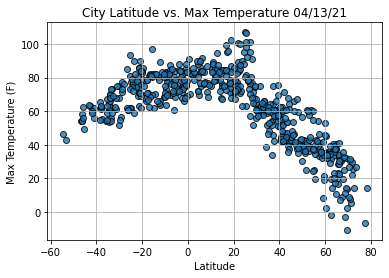

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

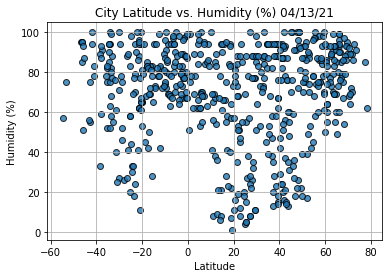

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

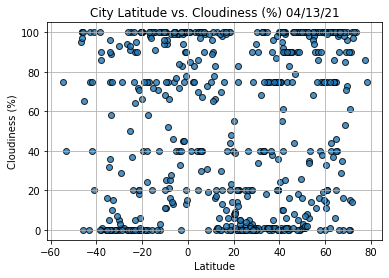

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

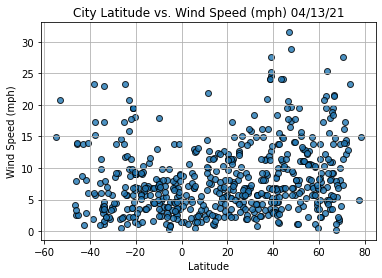

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City               Cabo San Lucas
Country                        MX
Date          2021-04-13 06:42:25
Lat                       22.8909
Lng                      -109.912
Max Temp                    71.01
Humidity                       45
Cloudiness                      0
Wind Speed                  14.85
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
562    False
563     True
564     True
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Kaka,TM,2021-04-13 06:46:50,37.3482,59.6143,74.93,20,96,8.97
5,Tuktoyaktuk,CA,2021-04-13 06:46:50,69.4541,-133.0374,13.77,93,96,8.05
7,Manzanillo,CU,2021-04-13 06:46:51,20.3433,-77.1167,75.33,83,6,2.64
12,Barrow,US,2021-04-13 06:43:58,71.2906,-156.7887,5.00,72,90,17.27
13,Cabo San Lucas,MX,2021-04-13 06:42:25,22.8909,-109.9124,71.01,45,0,14.85


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

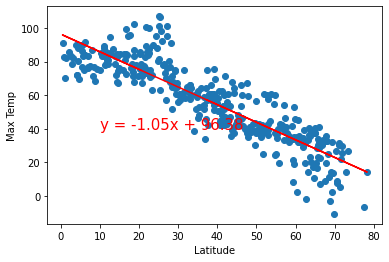

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

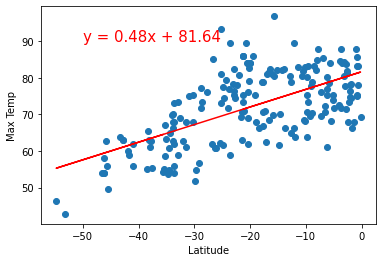

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

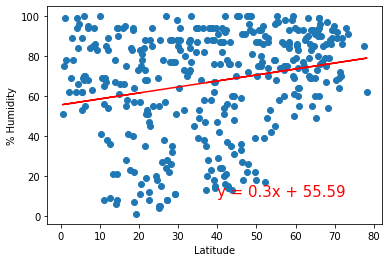

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


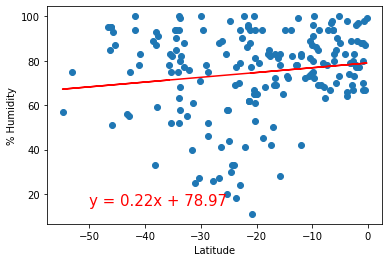

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


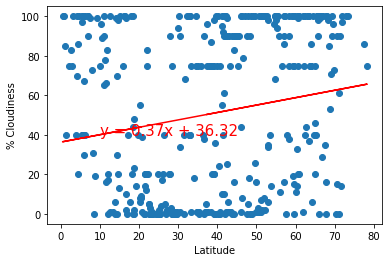

In [41]:
# SKILL DRILL
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

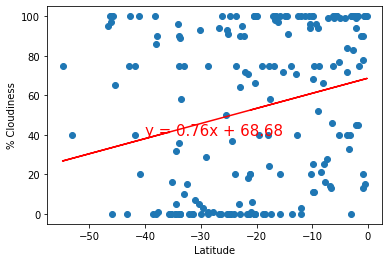

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-40,40))

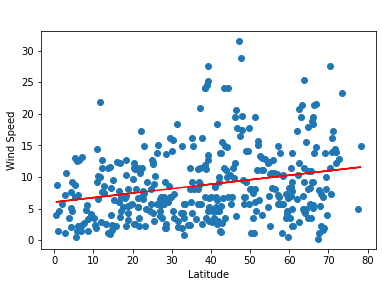

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

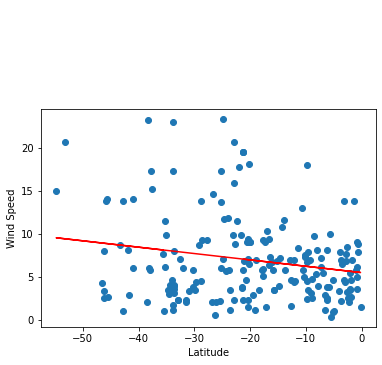

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))